### **Phase 1 : Extraction de frames depuis la vidéo**

In [37]:
import cv2
import os

video_path = r"D:\PFE_M2\video\Wallix.mp4"
output_dir = r"D:\PFE_M2\frames"
'''interval_seconds = 2  # => 1 frame toutes les 2 secondes

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("[ERREUR] Impossible d'ouvrir la vidéo.")
    exit()

fps = cap.get(cv2.CAP_PROP_FPS)
if fps == 0:
    print("[ERREUR] FPS nul, la vidéo est peut-être corrompue ou le format n'est pas supporté.")
    exit()

interval = int(fps * interval_seconds)  # 1 image toutes les N frames

frame_id = 0
frame_count = 0

os.makedirs(output_dir, exist_ok=True)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % interval == 0:
        filename = os.path.join(output_dir, f"frame_{frame_id}.png")
        cv2.imwrite(filename, frame)
        frame_id += 1

    frame_count += 1

cap.release()
print("✅ Extraction terminée. Total frames extraites :", frame_id)'''

'interval_seconds = 2  # => 1 frame toutes les 2 secondes\n\ncap = cv2.VideoCapture(video_path)\n\nif not cap.isOpened():\n    print("[ERREUR] Impossible d\'ouvrir la vidéo.")\n    exit()\n\nfps = cap.get(cv2.CAP_PROP_FPS)\nif fps == 0:\n    print("[ERREUR] FPS nul, la vidéo est peut-être corrompue ou le format n\'est pas supporté.")\n    exit()\n\ninterval = int(fps * interval_seconds)  # 1 image toutes les N frames\n\nframe_id = 0\nframe_count = 0\n\nos.makedirs(output_dir, exist_ok=True)\n\nwhile cap.isOpened():\n    ret, frame = cap.read()\n    if not ret:\n        break\n\n    if frame_count % interval == 0:\n        filename = os.path.join(output_dir, f"frame_{frame_id}.png")\n        cv2.imwrite(filename, frame)\n        frame_id += 1\n\n    frame_count += 1\n\ncap.release()\nprint("✅ Extraction terminée. Total frames extraites :", frame_id)'

In [38]:
import pytesseract
# Configuration Tesseract (à faire une seule fois)
pytesseract.pytesseract.tesseract_cmd = r"D:\Tesseract\tesseract.exe"

#### Définir la zone du terminal où extraire les commandes 

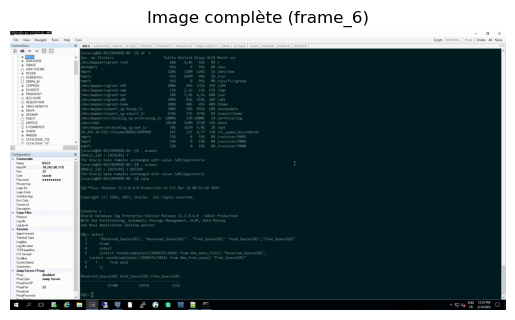

In [40]:
import matplotlib.pyplot as plt

# === Chargement de l'image ===
image_path = r"D:\PFE_M2\frames\frame_6.png"
img = cv2.imread(image_path)

# Affichage de l'image d'origine
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image complète (frame_6)")
plt.axis('off')
plt.show()

In [41]:
# Zone ROI 
# x : Position horizontale (colonne); y : Position verticale (ligne); w : Largeur du rectangle et h : Hauteur du rectangle

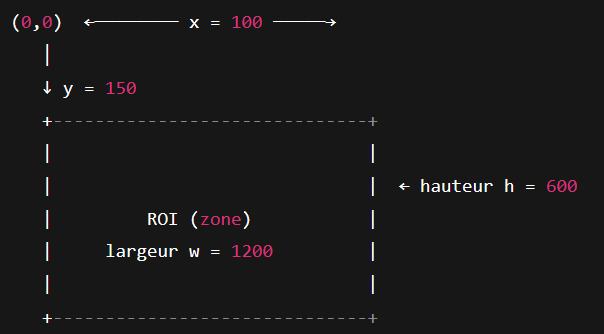

In [43]:
# === Étape A : Définir la zone d'intérêt (CLI terminal) ===
x, y, w, h = 265, 70, 2000, 965  # À ajuster selon le cas
roi = img[y:y+h, x:x+w]

# Affichage avec rectangle sur l’image originale
preview = img.copy()
cv2.rectangle(preview, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.imshow("Zone CLI (visualisation)", preview)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
# === Étape B : Prétraitement de l'image ===

# 1. Conversion en niveaux de gris
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# 2. Redimensionnement pour améliorer la lisibilité
gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# 3. Amélioration du contraste avec égalisation d'histogramme
gray_eq = cv2.equalizeHist(gray)

'# 4. Binarisation : plusieurs méthodes pour comparer\n_, thresh_otsu = cv2.threshold(gray_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)\n_, thresh_inv = cv2.threshold(gray_eq, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)\nadaptive_thresh = cv2.adaptiveThreshold(\n    gray_eq, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2\n)'

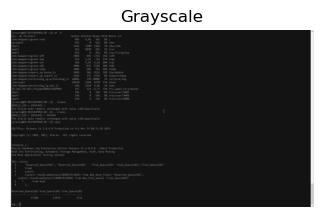

In [45]:
# === Étape C : Affichage comparatif des résultats ===
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")
plt.show()

In [46]:
# === Extraction du texte par OCR ===
custom_config = r'--oem 3 --psm 6 -c preserve_interword_spaces=1' 
text = pytesseract.image_to_string(gray, config=custom_config)

print("\n--- Texte extrait ---\n")
print(text)


--- Texte extrait ---

[oracle@OV-BSCSR4PROD-BD ~]$ df -h
Sys. de fichiers                        Taille Utilisé Dispo Uti% Monté sur
/dev/mapper/vgroot-root                    60G    4,4G   56G   8% /
devtmpfs                                   95G       2)   95G   0% /dev
tmpfs                                     1286    310M 128G 1% /dev/shm
tmpfs                                      95G    682M   94G   1% /run
tmpfs                                      95G       2)   95G   0% /sys/fs/cgroup
/dev/mapper/vgroot-u99                    200G     69G 131G 35% /u99
/dev/mapper/vgroot-tmp                     15G    2,5G 13G 17% /tmp
/dev/mapper/vgroot-var                     10G    5,9G 4,1G 60% /var
/dev/mapper/vgroot-u@1                    300G     83G 218G 28% /u@1
/dev/mapper/vgroot-home                   100G     60G   41G 60% /home
/dev/mapper/export_vg-backp_lv            50@G     50@G 451G 10% /backpdata
/dev/mapper/export_vg-export_lv           510G     37G 474G   8% /export/home


##### OCR sur toutes les images du dossier frames

In [48]:
import os
import cv2
import pytesseract
import pandas as pd
from tqdm import tqdm

# Configuration Tesseract
pytesseract.pytesseract.tesseract_cmd = r"D:\Tesseract\tesseract.exe"

# Répertoire contenant les frames
frames_dir = r"D:\PFE_M2\frames"
frames = sorted(
    [f for f in os.listdir(frames_dir) if f.endswith(".png")],
    key=lambda x: int(x.split('_')[1].split('.')[0])
)

# Coordonnées de la zone CLI
x, y, w, h = 265, 70, 2000, 965  # À ajuster une fois si besoin

# Liste pour stocker les résultats OCR
data = []

# Boucle de traitement
for frame_name in tqdm(frames, desc="Traitement des frames"):
    frame_path = os.path.join(frames_dir, frame_name)
    img = cv2.imread(frame_path)

    if img is None:
        print(f"Erreur de lecture : {frame_name}")
        continue

    # Étape : Extraire la zone du terminal
    roi = img[y:y+h, x:x+w]

    # Prétraitement : grayscale + resize + égalisation contraste
    # 1. Conversion en niveaux de gris
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    # 2. Redimensionnement pour améliorer la lisibilité
    gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    # 3. Amélioration du contraste avec égalisation d'histogramme
    gray_eq = cv2.equalizeHist(gray) # Amélioration du contraste

    # OCR sur l'image prétraitée (grayscale)
    custom_config = r'--oem 3 --psm 6 -c preserve_interword_spaces=1'
    text = pytesseract.image_to_string(gray, config=custom_config)

    # Stocker le résultat
    data.append({
        "frame": frame_name,
        "text_of_frame": text
    })

# Convertir en DataFrame
text_frame = pd.DataFrame(data)

Traitement des frames: 100%|██████████████████████████████████████████████████████████████████████| 547/547 [34:34<00:00,  3.79s/it]


In [49]:
text_frame

,frame,text_of_frame
0,frame_0.png,is\n
1,frame_1.png,Avertissement de connexion\n\nCe sytéme inform...
2,frame_2.png,"»\n~ ~e\nhe By,\n ..."
3,frame_3.png,Multi-Factor Authentication\nEnter the MFA cod...
4,frame_4.png,Multi-Factor Authentication\nEnter the MFA cod...
...,...,...
542,frame_542.png,Oracle Database 11g Enterprise Edition Release...
543,frame_543.png,Oracle Database 11g Enterprise Edition Release...
544,frame_544.png,Oracle Database 11g Enterprise Edition Release...
545,frame_545.png,Oracle Database 11g Enterprise Edition Release...


### **Phase 3 : Extraction username et servername** 

In [51]:
import re
import pandas as pd

# Fonction d'extraction username & servername à partir d'une ligne de texte
def extract_user_server(text):
    match = re.search(r'\[([^\s@]+)@([^\s\]]+)\s~\](?:\$|#)', text)
    if match:
        return match.group(1), match.group(2)
    return "inconnu", "inconnu"

# Exemple d'application à un DataFrame
text_frame[["username", "servername"]] = text_frame["text_of_frame"].apply(
    lambda txt: pd.Series(extract_user_server(txt))
)

In [52]:
# Affichage final (structure conservée)
text_frame

,frame,text_of_frame,username,servername
0,frame_0.png,is\n,inconnu,inconnu
1,frame_1.png,Avertissement de connexion\n\nCe sytéme inform...,inconnu,inconnu
2,frame_2.png,"»\n~ ~e\nhe By,\n ...",inconnu,inconnu
3,frame_3.png,Multi-Factor Authentication\nEnter the MFA cod...,inconnu,inconnu
4,frame_4.png,Multi-Factor Authentication\nEnter the MFA cod...,inconnu,inconnu
...,...,...,...,...
542,frame_542.png,Oracle Database 11g Enterprise Edition Release...,oracle,OV-BSCSR4PROD-BD
543,frame_543.png,Oracle Database 11g Enterprise Edition Release...,oracle,OV-BSCSR4PROD-BD
544,frame_544.png,Oracle Database 11g Enterprise Edition Release...,oracle,OV-BSCSR4PROD-BD
545,frame_545.png,Oracle Database 11g Enterprise Edition Release...,oracle,OV-BSCSR4PROD-BD


In [53]:
import os

# Définir le chemin de destination
output_path = r'D:\PFE_M2\ocr_results\text_frame.csv'

# Sauvegarder le DataFrame
text_frame.to_csv(output_path, index=False)

print(f"DataFrame enregistré à : {output_path}")

DataFrame enregistré à : D:\PFE_M2\ocr_results\text_frame.csv
